# Spoofing Signal Extraction ARP - 8.27.2024
### MITM ARP Spoofing Feature Analysis | Threat Profiling | Joseph Benyam

##### DNS Spoofing Method: relies on the transmission of manipulated DNS (DomainNameService) messages to associate the MAC address of the malicious device with the IP address of some other legitimate device in the network. This enables attackers to intercept, modify, or block network traffic 

In [1]:
import pandas as pd

# Load the datasets
benign_traffic = pd.read_csv('/home/jbenyam/threatdetection/dataset/csv/Benign_Final/BenignTraffic.pcap.csv')
attack_traffic = pd.read_csv('/home/jbenyam/threatdetection/dataset/csv/DNS_Spoofing/DNS_Spoofing.pcap.csv')

# Display the first few rows of each dataset to understand their structure
benign_traffic.head(), attack_traffic.head()


(   Header_Length  Protocol Type  Time_To_Live         Rate  fin_flag_number  \
 0           32.0              6         198.4   430.273287              0.0   
 1           22.4              6         114.4   484.616113              0.0   
 2           27.2              6          62.5   398.610950              0.0   
 3           23.2              6          62.1   425.187438              0.0   
 4           32.0              6          64.0  1563.521956              0.0   
 
    syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
 0              0.0              0.0              0.0              1.0   
 1              0.0              0.0              0.2              0.6   
 2              0.0              0.0              0.0              0.8   
 3              0.1              0.0              0.0              0.6   
 4              0.0              0.0              0.1              1.0   
 
    ece_flag_number  ...  LLC  Tot sum  Min   Max     AVG          Std  

In [13]:
# Removing Statistical Features to isolate raw features in network traffic for correlation analysis
#features_to_remove = ['Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Variance']
features_to_remove = ['SSH']

attack_traffic = attack_traffic.drop(features_to_remove, axis=1)
benign_traffic = benign_traffic.drop(features_to_remove, axis=1)

print("Columns in attack_traffic:")
print(attack_traffic.columns)

print("Columns in benign_traffic:")
print(benign_traffic.columns)


Columns in attack_traffic:
Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP',
       'IGMP', 'IPv', 'LLC', 'IAT', 'Number'],
      dtype='object')
Columns in benign_traffic:
Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP',
       'IGMP', 'IPv', 'LLC', 'IAT', 'Number'],
      dtype='object')


(['Header_Length',
  'Protocol Type',
  'Time_To_Live',
  'Rate',
  'fin_flag_number',
  'syn_flag_number',
  'rst_flag_number',
  'psh_flag_number',
  'ack_flag_number',
  'ece_flag_number',
  'cwr_flag_number',
  'ack_count',
  'syn_count',
  'fin_count',
  'rst_count',
  'HTTP',
  'HTTPS',
  'DNS',
  'Telnet',
  'SMTP',
  'SSH',
  'IRC',
  'TCP',
  'UDP',
  'DHCP',
  'ARP',
  'ICMP',
  'IGMP',
  'IPv',
  'LLC',
  'Tot sum',
  'Min',
  'Max',
  'AVG',
  'Std',
  'Tot size',
  'IAT',
  'Number',
  'Variance'],
 ['Header_Length',
  'Protocol Type',
  'Time_To_Live',
  'Rate',
  'fin_flag_number',
  'syn_flag_number',
  'rst_flag_number',
  'psh_flag_number',
  'ack_flag_number',
  'ece_flag_number',
  'cwr_flag_number',
  'ack_count',
  'syn_count',
  'fin_count',
  'rst_count',
  'HTTP',
  'HTTPS',
  'DNS',
  'Telnet',
  'SMTP',
  'SSH',
  'IRC',
  'TCP',
  'UDP',
  'DHCP',
  'ARP',
  'ICMP',
  'IGMP',
  'IPv',
  'LLC',
  'Tot sum',
  'Min',
  'Max',
  'AVG',
  'Std',
  'Tot size',
  

In [14]:
# Select a all features to compare

# Calculate the descriptive statistics for these features
benign_stats = benign_traffic.describe()
attack_stats = attack_traffic.describe()

benign_stats, attack_stats


(       Header_Length  Protocol Type   Time_To_Live          Rate  \
 count  362361.000000  362361.000000  362361.000000  3.623610e+05   
 mean       26.701672       7.107147     108.504222           inf   
 std         6.983413       3.343224      48.370953           NaN   
 min         0.000000       0.000000       0.000000  7.697838e+00   
 25%        22.400000       6.000000      70.000000  8.522029e+01   
 50%        28.000000       6.000000      93.500000  1.610023e+02   
 75%        32.000000       6.000000     131.400000  5.577235e+02   
 max        60.000000      17.000000     250.600000           inf   
 
        fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  \
 count    362361.000000    362361.000000    362361.000000    362361.000000   
 mean          0.022801         0.025565         0.001970         0.173028   
 std           0.050855         0.052081         0.019888         0.156156   
 min           0.000000         0.000000         0.000000        

In [15]:
#### Correlation Analysis & Distribution Comparision

# Compute correlations and distribution differences between attack and benign traffic for key features

# Correlation matrices for benign and attack traffic
benign_corr = benign_traffic.corr()
attack_corr = attack_traffic.corr()

# Benign 
print("Benign Traffic | Correlation Matrix")
print(benign_corr)


# Attack Traffic Correlation Matrix:
print("Attack Traffic | Correlation Matrix")
print(attack_corr)

# Difference in correlation matrices
corr_diff = attack_corr - benign_corr

print("Correlation difference Matrix")
print(corr_diff)

# Distribution comparison for key features
# dist_diff(key_features, benign_traffic, attack_traffic)


Benign Traffic | Correlation Matrix
                 Header_Length  Protocol Type  Time_To_Live      Rate  \
Header_Length         1.000000      -0.613362      0.219611  0.123305   
Protocol Type        -0.613362       1.000000     -0.156061 -0.035825   
Time_To_Live          0.219611      -0.156061      1.000000  0.004622   
Rate                  0.123305      -0.035825      0.004622  1.000000   
fin_flag_number      -0.062770      -0.067572     -0.175247 -0.045317   
syn_flag_number      -0.113862       0.009221     -0.173518 -0.052445   
rst_flag_number      -0.021090      -0.021010     -0.024899 -0.009375   
psh_flag_number       0.000653      -0.157783     -0.124472 -0.089860   
ack_flag_number       0.896770      -0.693393      0.284690  0.100827   
ece_flag_number       0.003511      -0.007073     -0.021249 -0.006046   
cwr_flag_number      -0.001452      -0.002054     -0.014823 -0.004764   
ack_count             0.895906      -0.692874      0.285000  0.099666   
syn_count      

#### Visualizing Correlation Matrices

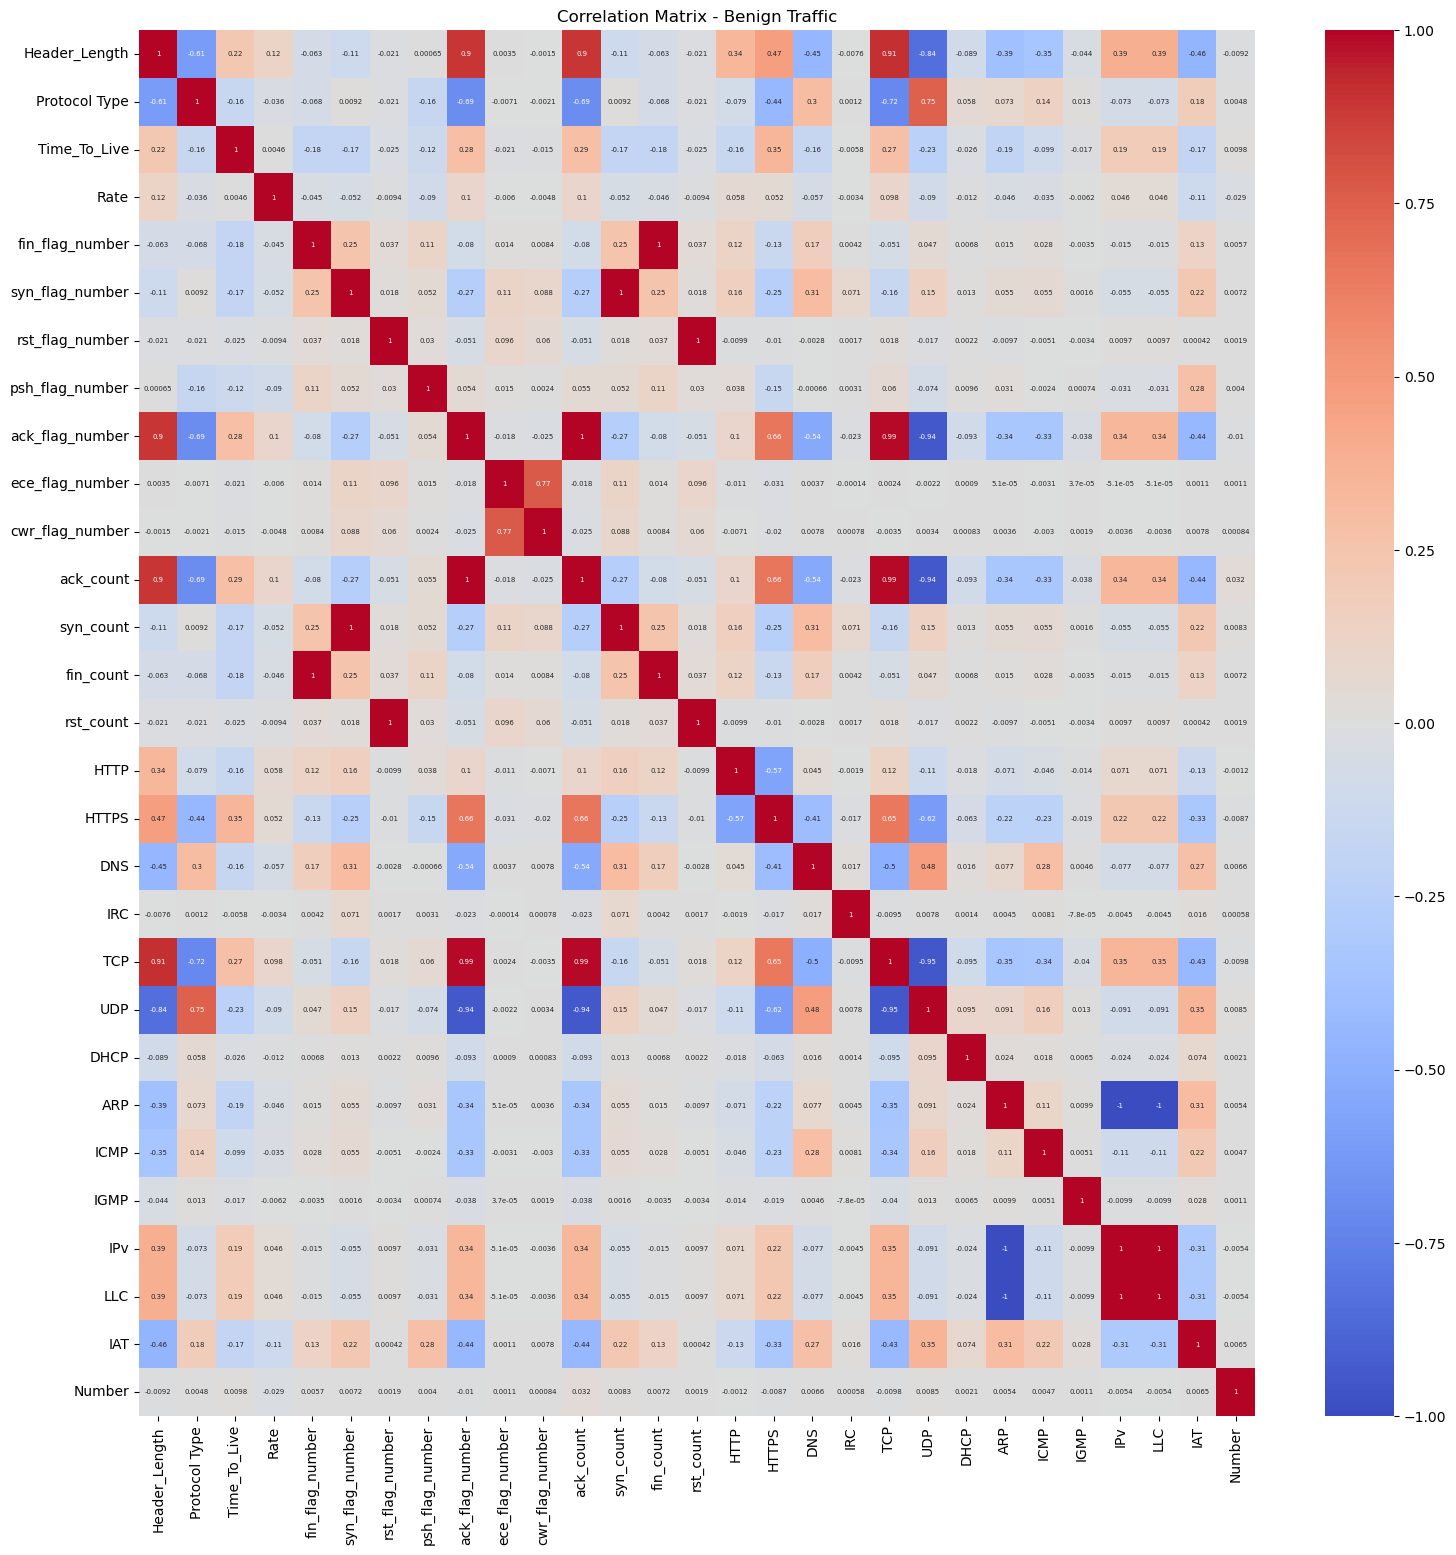

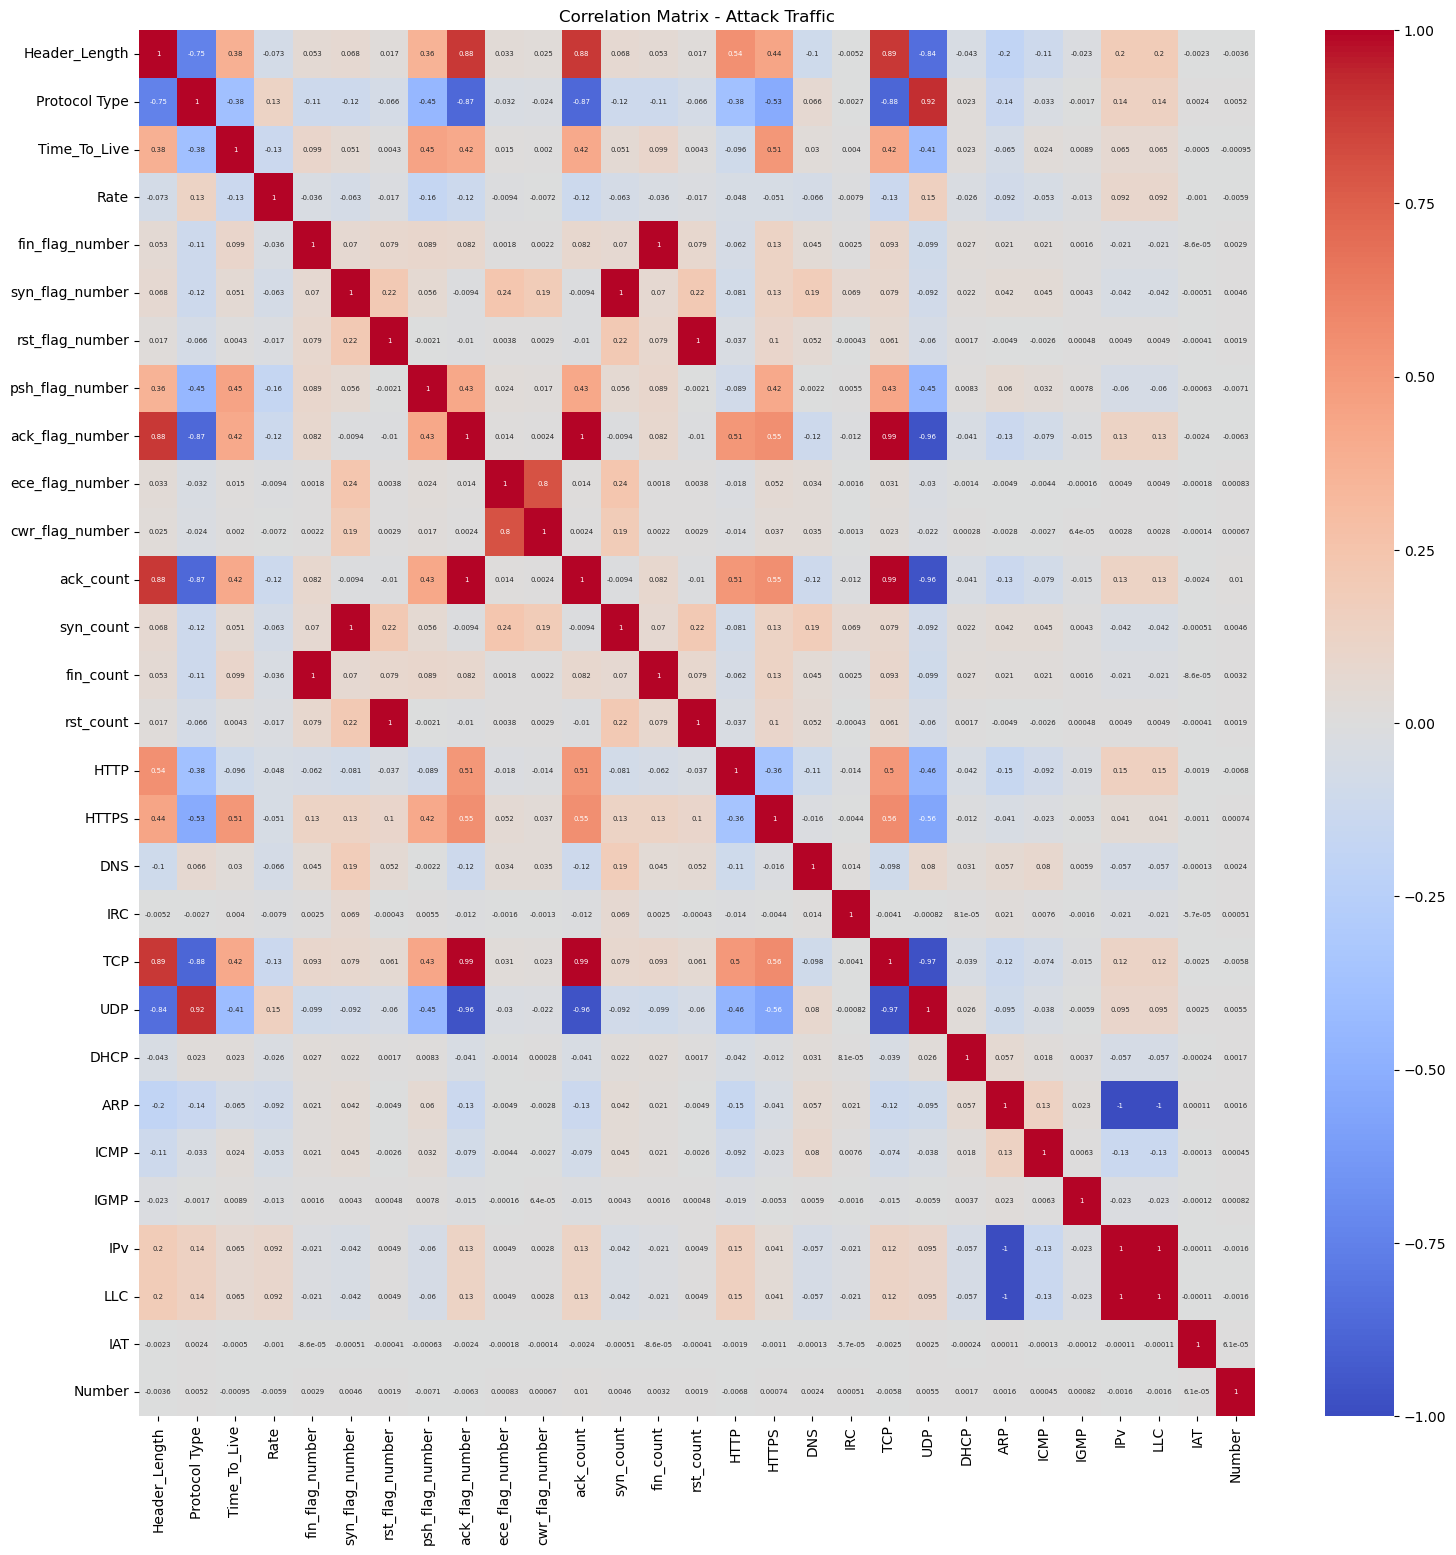

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation matrix for benign traffic
plt.figure(figsize=(18, 18))
sns.heatmap(benign_corr, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title('Correlation Matrix - Benign Traffic')
plt.show()

# Plot correlation matrix for attack traffic
plt.figure(figsize=(18, 18))
sns.heatmap(attack_corr, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title('Correlation Matrix - Attack Traffic')
plt.show()



#### Difference Correlation Matrix | Attack Traffic & Benign Traffic

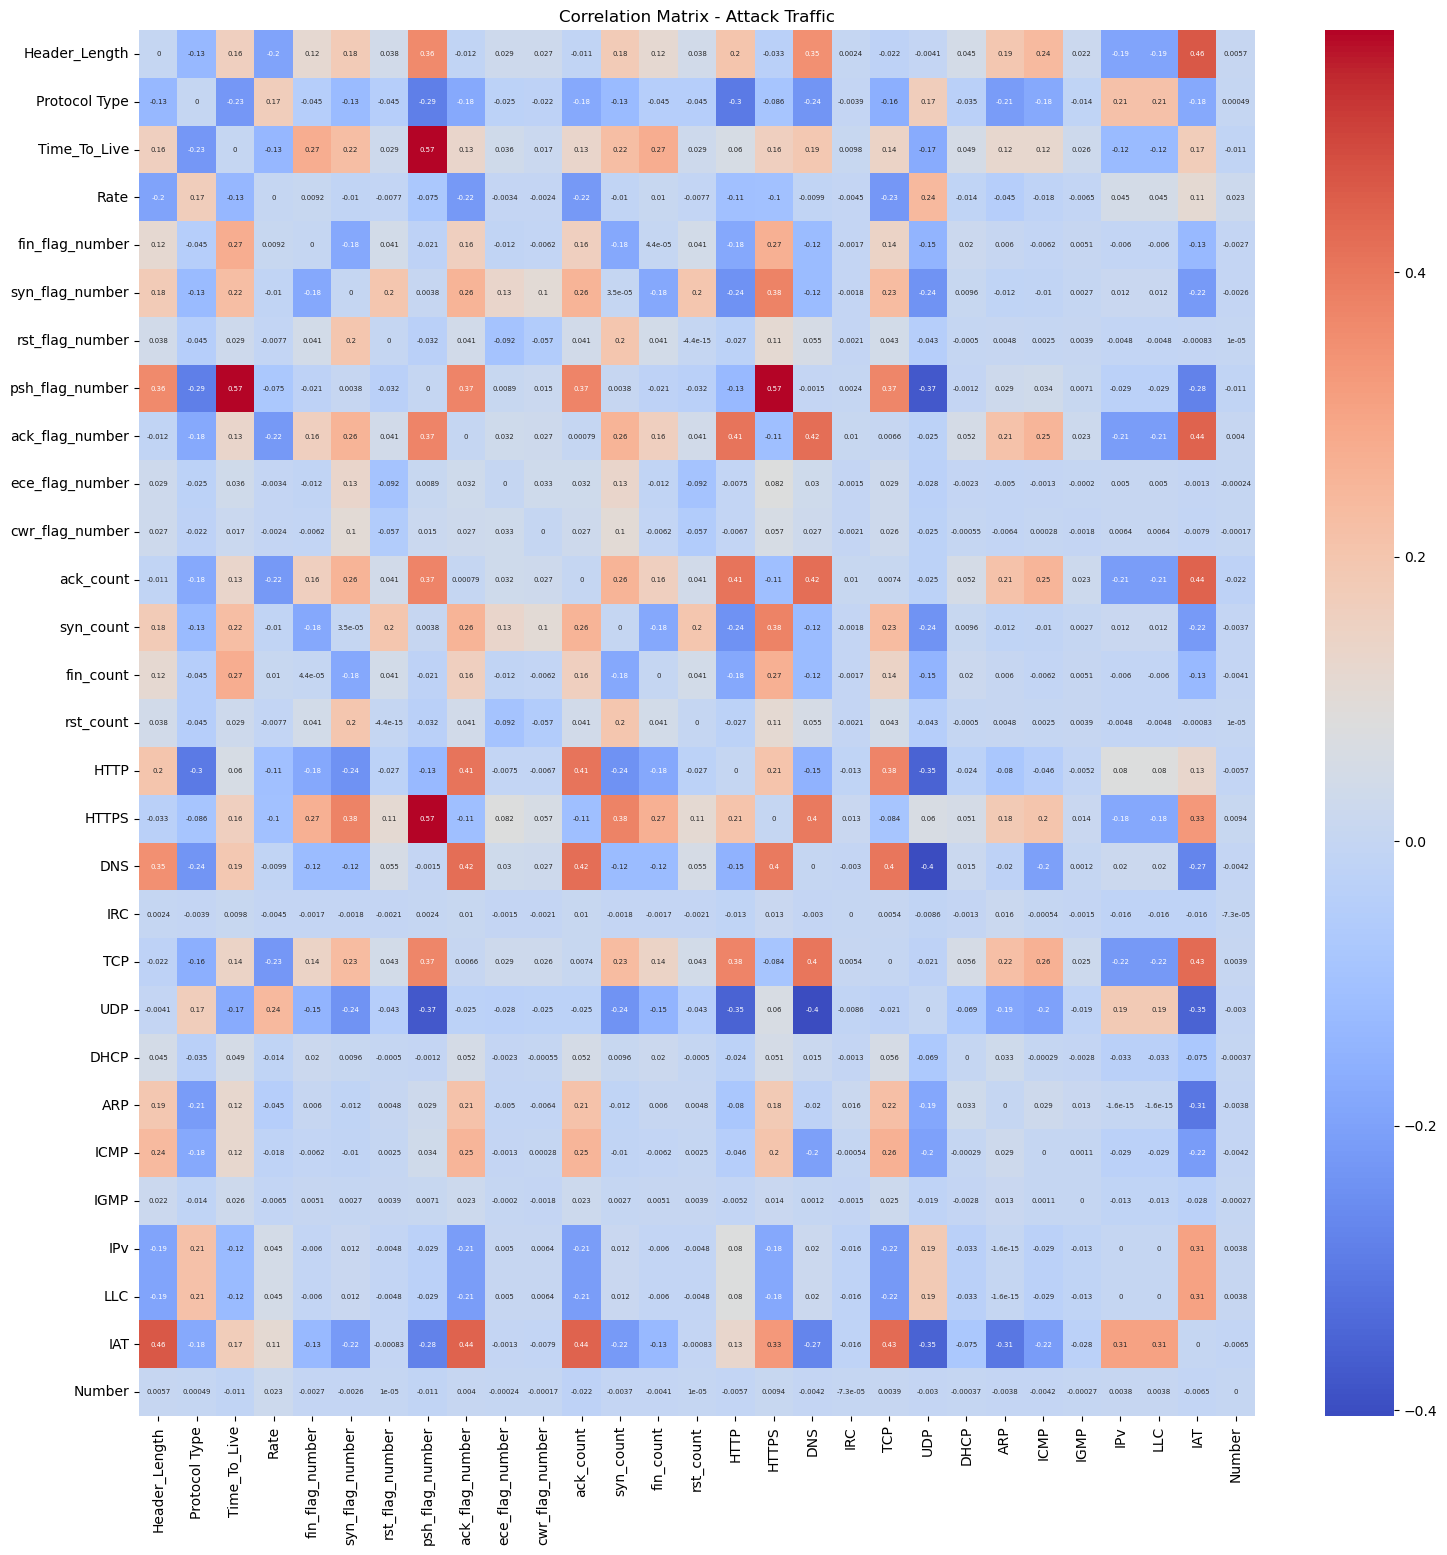

In [26]:
# Plot correlation difference matrix for attack traffic
plt.figure(figsize=(18, 18))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title('Correlation Matrix - Attack Traffic')
plt.show()


### Interpretation of Correlation Analysis | Key Observations:

#### High Positive Correlations in Attack Traffic:
- **ack_flag_number and psh_flag_number:** The correlation between these two features is significantly stronger in attack traffic compared to benign traffic. This suggests that these flags are more likely to be set together during DNS spoofing attacks.
- **Header_Length and ack_flag_number:** This relationship remains strongly positive in both benign and attack traffic, but the increase in correlation for attack traffic may suggest some characteristic manipulation of packet headers during DNS spoofing.

#### Significant Changes in Correlation:
- **Time_To_Live and psh_flag_number:** The correlation increases substantially in attack traffic, indicating that the time-to-live field might be manipulated alongside push flags in DNS spoofing.
- **Rate and HTTPS:** The correlation is negative in benign traffic and positive in attack traffic, suggesting that HTTPS traffic behaves differently under DNS spoofing conditions, potentially due to abnormal packet rates.

#### Unique Patterns in Attack Traffic:
- **Protocol Type and UDP:** The correlation increases in attack traffic, indicating that the use of UDP in certain protocol types is more common in DNS spoofing.
- **TCP and UDP:** There is a substantial correlation in benign traffic which becomes almost non-existent in attack traffic, suggesting that normal TCP-UDP traffic relationships are disrupted during DNS spoofing.

#### Notable Feature Anomalies:
- **HTTP and HTTPS:** In benign traffic, HTTP and HTTPS show some positive correlation with each other and with other features like Rate. In attack traffic, these correlations shift or weaken, indicating that web traffic characteristics may differ significantly during DNS spoofing.
- **DNS:** The correlation between DNS and other features such as ARP, ICMP, and UDP sees notable shifts, highlighting DNS interactions as a key area where spoofing affects traffic patterns.

#### Actionable Features:

#### Based on these observations, the following features are most relevant for detecting DNS spoofing based on their changes in correlation patterns:

- **ack_flag_number**
- **psh_flag_number**
- **Time_To_Live**
- **HTTPS**
- **Protocol Type**
- **UDP**
- **DNS**

### Feature Importance Analysis | Random Forest Ensemble
#### Apply Feature Importance w.Random Forest Classifier
##### Method to determine the features more significant in signaling ARP spoofing, based on the benign traffic and attack traffic data.